# Messing around with Bayesian learning
In this note book I'm going to be experimenting with a Bayesian model. The premise of this notebook is that there is a candy bag that contains a mixture of cherry and lime candies. I think there are infinitly many candies. The bayesian model will try to predict what is the ratio of the cherry and lime candies in the mixture. For this notebook the model will be called Kandy Klause or Kalus, and the mystery bag will be called yummy_bag.

In [1]:
class CandyFlavor:
    cherry = "Cherry"
    lime   = "Lime"
    
class Candy:
    """A class to model a candy"""
    def __init__(self, flavor=CandyFlavor.cherry):
        self.__flavor=flavor
    @property
    def flavor(self):
        return self.__flavor
    def __str__(self):
        return f'{self.flavor} flavored candy'

import random
class CandyBag:
    """A class to model the candy bag"""
    def __init__(self, ratio=0.5, num_candies=-1):
        """ratio: The ratio of cherry candies to lime candies"""
        self.ratio=ratio
        self.num_candies=num_candies
    def __iter__(self, num_candies=10):
        """num_candies: The max number of candies this itterator will spit out
        returns a Candy bag with num_candy candies"""
        return CandyBag(self.ratio, num_candies)
    def __next__(self):
        """Pick the next candy from the bag"""
        if self.num_candies==0:
            raise StopIteration
        else:
            self.num_candies-=1
            nxt_flavor = random.choice([CandyFlavor.cherry, CandyFlavor.lime])
            return Candy(nxt_flavor)
    def __repr__(self):
        return f'Candy bag with {100*self.ratio}% cherry candies and {100-100*self.ratio}% lime candies'
            
        

In [2]:
bag = CandyBag()

In [3]:
print(next(bag)) # Spam run this cell to get the candies from this bag

Cherry flavored candy


In [4]:
for i,candy in enumerate(bag):
    print(f'{i+1}. {candy}')

1. Cherry flavored candy
2. Cherry flavored candy
3. Cherry flavored candy
4. Lime flavored candy
5. Lime flavored candy
6. Cherry flavored candy
7. Lime flavored candy
8. Cherry flavored candy
9. Lime flavored candy
10. Lime flavored candy


## Simple Start
To start Kandy Klaus will be working in a simple situation. He knows that yummy_bag will be one of 5 types.

These are his 5 hypotheses
1. 10% chance the yummy_bag only has cherry candies
1. 20% chance the yummy_bag has 75% cherry candies and 25% lime candies
2. 40% chance the yummy_bag has 50% cherry candies and 50% lime candies
3. 20% chance the yummy_bag has 25% cherry candies and 75% lime candies
4. 10% chance the yummy_bag only has lime candies

To identify yummy_bag, Klaus can keep taking candies from it, check those candies and make a prediction about yummy_bag based on the candies he has pulled out so far.


In [5]:
hypotheses = [
    (0.10, CandyBag(1.00)),
    (0.20, CandyBag(0.75)),
    (0.40, CandyBag(0.50)),
    (0.20, CandyBag(0.25)),
    (0.10, CandyBag(0.00))
] # These are tupples of the probabality of a hypothesis and the hypothetical bag

### Senario
Klaus has taken 10 candies from yummy_bag, and all 10 of them are lime flavored. This is the observed data. For each of his hypothesis, 
    
    Klaus needs to find the probabality that the hypothesis is true given the observed data has happened.
    = P(h|d)

This is not straight forward or intuitive. However the reverse is straightforward.

    For Klause, it is easy to find the probabality that observed data happened given the hypothesis is true.
    = P(d|h), also called likelyhood

Luckily Bayes theorm allows us to use this ( P(d|h) ) to find what we want ( P(h|d) )

    P(h|d) = P(d|h)*P(h)/P(d)
    P(d) = probabality of observed data happening. (consideres prob of each hypo and then the prob of data)
    P(H|d) = @P(d|H)*P(H)



In [6]:
p_event = sum( [ h[0]*(1-h[1].ratio)**10 for h in hypotheses ] )  # p_event is P(d)
predictions = [ (h[1], h[0]*(1-h[1].ratio)**10 / p_event,) for h in hypotheses ] 
predictions

[(Candy bag with 100.0% cherry candies and 0.0% lime candies, 0.0),
 (Candy bag with 75.0% cherry candies and 25.0% lime candies,
  1.7082745402179075e-06),
 (Candy bag with 50.0% cherry candies and 50.0% lime candies,
  0.0034985462583662745),
 (Candy bag with 25.0% cherry candies and 75.0% lime candies,
  0.10087190332532722),
 (Candy bag with 0.0% cherry candies and 100.0% lime candies,
  0.8956278421417663)]

In [7]:
def get_predictions(n):
    """Get probabality for each hypothesis being true after n limes have been removed from yummy_bag"""
    p_event = sum( [ h[0]*(1-h[1].ratio)**n for h in hypotheses ] )
    predictions = [ h[0]*(1-h[1].ratio)**n / p_event for h in hypotheses ] 
    return predictions

print('\n'.join([str(i) for i in get_predictions(10)]))

0.0
1.7082745402179075e-06
0.0034985462583662745
0.10087190332532722
0.8956278421417663


Plot of probabality of each hypothesis after a lime is pulled from the bag


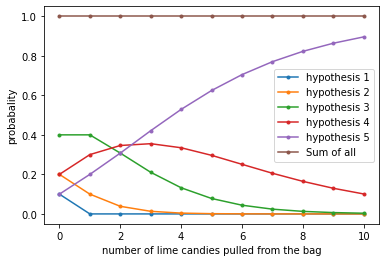

In [27]:
datas = [i for i in range(11)]
ranged_predictions = [get_predictions(i) for i in datas]
y_values = list(zip(*ranged_predictions))
import matplotlib.pyplot as plt
for i, y in enumerate(y_values):
    plt.plot(datas, y, ".-", label=f"hypothesis {i+1}")

sums = [sum(preds) for preds in ranged_predictions]
plt.plot(datas, sums, ".-", label="Sum of all")
plt.xlabel("number of lime candies pulled from the bag")
plt.ylabel("probabality")
plt.legend()
print("Plot of probabality of each hypothesis after a lime is pulled from the bag")